# Ship Fuel Efficiency Analysis Project

## 주제
- 어떤 요소들이 선박의 연료 효율성에 있어 크게 영향을 미치는가?
     - 각 컬럼 별 선박 연료 효율성에 대한 상관관계 분석


### 데이터 컬럼 정보

| Column Name               | Description                        | Unit          |
|---------------------------|------------------------------------|---------------|
| Date                      | 선박의 출발 날짜                    | YYYY-MM-DD    |
| Ship_ID                   | 선박의 고유 식별자                  | -             |
| Route_Category            | 운항 경로의 카테고리                | -             |
| Speed_knots               | 선박의 속도                         | knots         |
| Fuel_Consumption_per_Day  | 일일 연료 소비량                    | 톤 (tons)     |
| Nautical_Miles            | 운항 거리                           | 해리 (nmi)    |
| Ship_Type                 | 선박 타입                           | -             |
| Cargo_Volume              | 화물량                              | 입방 미터 (m³)|
| Fuel_Type                 | 사용된 연료의 종류                  | -             |
| Weather_Conditions        | 운항 중의 기상 조건                 | -             |
| CO2_Emissions             | 이산화탄소 배출량                   | 톤 (tons)     |
| Departure_Time            | 출발 날짜 및 시간                   | YYYY-MM-DD HH:MM:SS |
| Arrival_Time              | 도착 날짜 및 시간                   | YYYY-MM-DD HH:MM:SS |
| Travel_Time               | 총 소요 시간                        | 시간 (hours)  |

#### Step 1. 데이터 불러오기

In [1]:
import pandas as pd

# 데이터 불러오기
train_data = pd.read_excel('train_ship_operations_data.xlsx')
test_data = pd.read_excel('test_ship_operations_data.xlsx')

#df_all = train_data
# 훈련 데이터와 테스트 데이터 결합
df_all = pd.concat([train_data, test_data])
df_all

,Date,Ship_ID,Route_Category,Speed_knots,Fuel_Consumption_per_Day,Nautical_Miles,Ship_Type,Cargo_Volume,Fuel_Type,Weather_Conditions,CO2_Emissions,Departure_Time,Arrival_Time,Travel_Time
0,2023-01-25,Ship_5426,Route63-2,19.448757,60.098874,1529.625386,Bulk,28953.744016,Diesel,Moderate,33.619629,2023-01-25 03:00:00,2023-01-25 04:00:00,97.570876
1,2023-09-14,Ship_1403,Route5-5,23.403979,60.378113,2605.711797,LNG Carrier,82273.577096,LNG,Rough,48.129431,2023-09-14 14:00:00,2023-09-14 06:00:00,160.558215
2,2023-02-20,Ship_7102,Route35,14.789903,60.471109,3954.368885,Tanker,31911.038263,Heavy Oil,Calm,78.292237,2023-02-20 19:00:00,2023-02-20 05:00:00,226.295879
3,2023-12-02,Ship_4329,Route54-4,17.464365,60.290155,3505.363330,Container,15769.689569,Diesel,Rough,70.465360,2023-12-02 10:00:00,2023-12-02 09:00:00,191.695061
4,2023-12-12,Ship_7312,Route62-4,19.052642,60.265112,3491.155976,Cruise,14622.330222,Diesel,Calm,70.723050,2023-12-12 06:00:00,2023-12-12 10:00:00,196.162562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2023-06-12,Ship_2037,Route77-2,20.809362,59.929882,2398.787720,Cruise,64945.003463,Diesel,Moderate,48.038822,2023-06-12 18:00:00,2023-06-12 07:00:00,133.124344
1996,2023-12-11,Ship_409,Route40-5,18.670150,60.454347,4485.014326,Container,61149.663626,Diesel,Moderate,84.204505,2023-12-11 03:00:00,2023-12-11 01:00:00,382.156803
1997,2023-04-24,Ship_642,Route53-5,16.659800,59.606566,1046.196963,Cruise,45477.335661,Diesel,Rough,22.671719,2023-04-24 04:00:00,2023-04-24 22:00:00,42.033384
1998,2023-03-04,Ship_815,Route3,14.613402,59.938227,3193.277351,LNG Carrier,12933.300410,LNG,Rough,66.051164,2023-03-04 08:00:00,2023-03-04 17:00:00,177.093871


In [2]:
# 각 컬럼의 데이터 타입 확인
df_all.dtypes

Date                        datetime64[ns]
Ship_ID                             object
Route_Category                      object
Speed_knots                        float64
Fuel_Consumption_per_Day           float64
Nautical_Miles                     float64
Ship_Type                           object
Cargo_Volume                       float64
Fuel_Type                           object
Weather_Conditions                  object
CO2_Emissions                      float64
Departure_Time                      object
Arrival_Time                        object
Travel_Time                        float64
dtype: object

#### Step 2. 데이터 전처리

##### Step 2-1. 부가 변수 제거 및 새로운 피처 생성

In [3]:
# Date와 Ship_ID 컬럼 제거
df_all.drop(['Date', 'Ship_ID'], axis=1, inplace=True)

# Departure_Time과 Arrival_Time 컬럼 분해
df_all['Departure_Date'] = pd.to_datetime(df_all['Departure_Time']).dt.date
df_all['Departure_time'] = pd.to_datetime(df_all['Departure_Time']).dt.time
df_all.drop('Departure_Time', axis=1, inplace=True)

df_all['Arrival_Date'] = pd.to_datetime(df_all['Arrival_Time']).dt.date
df_all['Arrival_time'] = pd.to_datetime(df_all['Arrival_Time']).dt.time
df_all.drop('Arrival_Time', axis=1, inplace=True)

In [4]:
# 계절을 매핑하는 함수입니다.
def map_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# 시간대를 매핑하는 함수입니다.
def map_time_of_day(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour < 24:
        return 'Afternoon'

# 날짜 컬럼에서 '월'을 추출하여 계절로 매핑합니다.
df_all['Departure_Season'] = df_all['Departure_Date'].apply(lambda x: map_season(x.month))
df_all['Arrival_Season'] = df_all['Arrival_Date'].apply(lambda x: map_season(x.month))

# 시간 컬럼에서 '시'를 추출하여 시간대로 매핑합니다.
df_all['Departure_TimeOfDay'] = df_all['Departure_time'].apply(lambda x: map_time_of_day(x.hour))
df_all['Arrival_TimeOfDay'] = df_all['Arrival_time'].apply(lambda x: map_time_of_day(x.hour))

# 원래의 날짜와 시간 컬럼을 삭제합니다.
df_all.drop(columns=['Departure_Date', 'Departure_time', 'Arrival_Date', 'Arrival_time'], inplace=True)

df_all

,Route_Category,Speed_knots,Fuel_Consumption_per_Day,Nautical_Miles,Ship_Type,Cargo_Volume,Fuel_Type,Weather_Conditions,CO2_Emissions,Travel_Time,Departure_Season,Arrival_Season,Departure_TimeOfDay,Arrival_TimeOfDay
0,Route63-2,19.448757,60.098874,1529.625386,Bulk,28953.744016,Diesel,Moderate,33.619629,97.570876,Winter,Winter,Early Morning,Early Morning
1,Route5-5,23.403979,60.378113,2605.711797,LNG Carrier,82273.577096,LNG,Rough,48.129431,160.558215,Autumn,Autumn,Afternoon,Morning
2,Route35,14.789903,60.471109,3954.368885,Tanker,31911.038263,Heavy Oil,Calm,78.292237,226.295879,Winter,Winter,Afternoon,Early Morning
3,Route54-4,17.464365,60.290155,3505.363330,Container,15769.689569,Diesel,Rough,70.465360,191.695061,Winter,Winter,Morning,Morning
4,Route62-4,19.052642,60.265112,3491.155976,Cruise,14622.330222,Diesel,Calm,70.723050,196.162562,Winter,Winter,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Route77-2,20.809362,59.929882,2398.787720,Cruise,64945.003463,Diesel,Moderate,48.038822,133.124344,Summer,Summer,Afternoon,Morning
1996,Route40-5,18.670150,60.454347,4485.014326,Container,61149.663626,Diesel,Moderate,84.204505,382.156803,Winter,Winter,Early Morning,Early Morning
1997,Route53-5,16.659800,59.606566,1046.196963,Cruise,45477.335661,Diesel,Rough,22.671719,42.033384,Spring,Spring,Early Morning,Afternoon
1998,Route3,14.613402,59.938227,3193.277351,LNG Carrier,12933.300410,LNG,Rough,66.051164,177.093871,Spring,Spring,Morning,Afternoon


##### Step 2-2. 단위 변경을 위한 피처 변환 & 숫자형 데이터에 대한 소수점 자릿수 처리

In [5]:
# Speed_knots 컬럼을 km/h 단위로 변환 & Nautical_Miles 컬럼을 km 단위로 변환
df_all['Speed_km'] = df_all['Speed_knots'] * 1.852
df_all['Distance_km'] = df_all['Nautical_Miles'] * 1.852

# 원본 컬럼 삭제
df_all.drop(['Speed_knots', 'Nautical_Miles'], axis=1, inplace=True)

# 숫자형 데이터 컬럼 선택 & 반올림
numeric_cols = df_all.select_dtypes(include=['float64', 'int64']).columns
df_all[numeric_cols] = df_all[numeric_cols].round(2)

df_all

,Route_Category,Fuel_Consumption_per_Day,Ship_Type,Cargo_Volume,Fuel_Type,Weather_Conditions,CO2_Emissions,Travel_Time,Departure_Season,Arrival_Season,Departure_TimeOfDay,Arrival_TimeOfDay,Speed_km,Distance_km
0,Route63-2,60.10,Bulk,28953.74,Diesel,Moderate,33.62,97.57,Winter,Winter,Early Morning,Early Morning,36.02,2832.87
1,Route5-5,60.38,LNG Carrier,82273.58,LNG,Rough,48.13,160.56,Autumn,Autumn,Afternoon,Morning,43.34,4825.78
2,Route35,60.47,Tanker,31911.04,Heavy Oil,Calm,78.29,226.30,Winter,Winter,Afternoon,Early Morning,27.39,7323.49
3,Route54-4,60.29,Container,15769.69,Diesel,Rough,70.47,191.70,Winter,Winter,Morning,Morning,32.34,6491.93
4,Route62-4,60.27,Cruise,14622.33,Diesel,Calm,70.72,196.16,Winter,Winter,Morning,Morning,35.29,6465.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Route77-2,59.93,Cruise,64945.00,Diesel,Moderate,48.04,133.12,Summer,Summer,Afternoon,Morning,38.54,4442.55
1996,Route40-5,60.45,Container,61149.66,Diesel,Moderate,84.20,382.16,Winter,Winter,Early Morning,Early Morning,34.58,8306.25
1997,Route53-5,59.61,Cruise,45477.34,Diesel,Rough,22.67,42.03,Spring,Spring,Early Morning,Afternoon,30.85,1937.56
1998,Route3,59.94,LNG Carrier,12933.30,LNG,Rough,66.05,177.09,Spring,Spring,Morning,Afternoon,27.06,5913.95


##### Step 2-3. 결측치 확인
- 결측치 처리 가이드라인 : 데이터의 특성, 결측치가 발생한 원인, 그리고 분석의 목적에 따라 달라질 수 있습니다.

    - 결측치 제거 (Deletion) :
        - 리스트와이즈 삭제 (Listwise Deletion) : 결측치가 있는 행(데이터 포인트) 전체를 삭제합니다. 데이터 손실이 크지만, 때로는 가장 간단하고 빠른 방법입니다.
        - 페어와이즈 삭제 (Pairwise Deletion) : 분석에 필요한 특정 변수가 결측치인 경우에만 해당 데이터 포인트를 제외합니다. 여러 분석에서 다른 데이터 포인트를 사용할 수 있습니다.
        
    - 결측치 대체 (Imputation) :
        - 평균값 대체 (Mean Imputation) : 결측치를 해당 변수의 평균값으로 대체합니다. 연속형 변수에 주로 사용됩니다.
        - 중앙값 대체 (Median Imputation) : 결측치를 중앙값으로 대체합니다. 극단값의 영향을 받지 않으려 할 때 유용합니다.
        - 최빈값 대체 (Mode Imputation) : 결측치를 가장 자주 나타나는 값(최빈값)으로 대체합니다. 범주형 변수에 주로 사용됩니다.
        - 다중 대입법 (Multiple Imputation) : 결측치 대체를 여러 번 반복하여 결측치를 여러 개의 대체값으로 채우고, 결과를 종합합니다. 더 정확한 추정을 가능하게 합니다.

    - 모델 기반 대체 (Model-Based Imputation) :
        - K-최근접 이웃 (K-Nearest Neighbors, KNN) : 결측치가 있는 데이터 포인트와 가장 유사한 K개의 데이터 포인트를 찾아, 그 데이터 포인트들의 값을 바탕으로 결측치를 예측하여 대체합니다.
        - 회귀 대체 (Regression Imputation) : 결측치가 있는 변수를 종속 변수로 보고, 다른 변수들을 독립 변수로 사용하여 회귀 모델을 구축한 후, 이 모델을 사용하여 결측치를 예측합니다.


    - 핫덱 대체 (Hot-Deck Imputation) :
     결측치가 있는 데이터와 유사한 속성을 가진 다른 데이터의 값으로 결측치를 대체합니다. 시간 순서대로 가장 가까운 값(콜드 덱 대체의 변형 포함)으로 채우는 방법입니다.

    - 상호 보완 (Interpolation and Extrapolation) : 
    시계열 데이터에서 결측치 앞뒤의 데이터를 사용하여 결측치를 보간(내삽)하거나 외삽하는 방법입니다.


In [6]:
df_all.isnull().sum()

Route_Category              0
Fuel_Consumption_per_Day    0
Ship_Type                   0
Cargo_Volume                0
Fuel_Type                   0
Weather_Conditions          0
CO2_Emissions               0
Travel_Time                 0
Departure_Season            0
Arrival_Season              0
Departure_TimeOfDay         0
Arrival_TimeOfDay           0
Speed_km                    0
Distance_km                 0
dtype: int64

##### Step 2-4. 수치형 데이터에 대한 스케일링 작업
- 정규화 (Normalization) : 정규화는 데이터의 값을 0과 1 사이의 범위로 조정합니다. 이는 각 피처의 최소값(min)과 최대값(max)을 사용하여 계산됩니다.
    > 정규화는 데이터의 분포가 균등할 때 특히 유용합니다.

    > 정규화가 적합한 경우 : 데이터의 범위가 각기 다르거나, 특정 스케일에 민감한 모델(예: K-최근접 이웃)을 사용할 때 적합할 수 있습니다.
- 표준화 (Standardization) : 표준화는 데이터의 평균을 0으로, 표준편차를 1로 조정하여 모든 피처들이 동일한 스케일을 가지게 합니다.
    > 표준화는 이상치가 있을 때 유용하며, 많은 머신 러닝 알고리즘에서 가정하는 정규 분포에 가깝게 데이터를 만들어줍니다.

    > 표준화가 적합한 경우 : 데이터가 정규 분포를 어느 정도 따르고, 이상치의 영향을 줄이고자 할 때, 또는 선형 회귀, 로지스틱 회귀와 같이 가중치를 기반으로 하는 모델을 사용할 때 적합할 수 있습니다.

c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

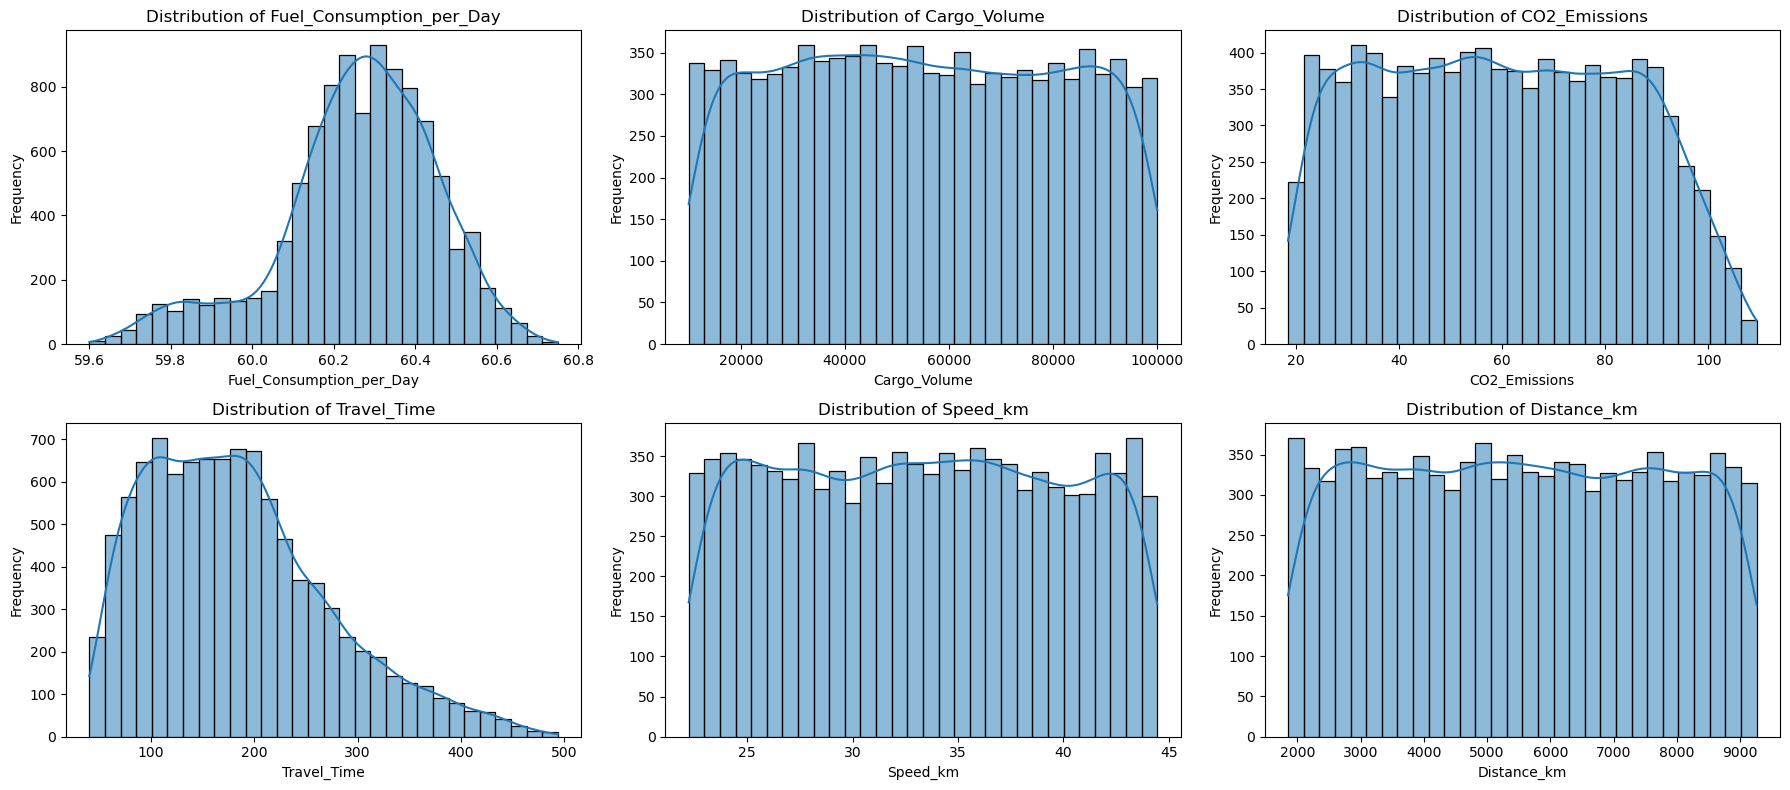

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df_all.select_dtypes(include=['float64', 'int64']).columns

# 서브플롯의 행과 열의 수 결정
n_cols = 3  # 한 행에 표시할 그래프 수
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # 전체 그래프를 위한 최소한의 행 수

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # 전체 Figure 크기 조정

for idx, col in enumerate(numeric_cols, 1):  # enumerate 시작 인덱스를 1로 설정
    plt.subplot(n_rows, n_cols, idx)  # n_rows 행, n_cols 열의 서브플롯 생성
    sns.histplot(df_all[col], kde=True, bins=30)  # 서브플롯에 히스토그램 생성
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # 서브플롯 간의 충돌 방지
plt.show()

###### (그래프에 대한 참고사항)
###### - 막대그래프 (Histogram) : 각 범위별 데이터의 빈도수를 나타내어 데이터의 분포를 직관적으로 보여준다.
###### - 줄 그래프 (KDE; Kernel Density Estimation) : 데이터의 밀도 추정을 통해 보다 부드러운 분포 형태를 시각화하여 데이터가 어떻게 분포되어 있는지 더 세밀하게 파악할 수 있도록 도와준다.

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 정규화를 위한 MinMaxScaler
minmax_scaler = MinMaxScaler()
# 표준화를 위한 StandardScaler
standard_scaler = StandardScaler()

df_scaled = df_all.copy()

# 정규화할 컬럼 선택
columns_to_normalize = ['Fuel_Consumption_per_Day', 'Cargo_Volume', 'CO2_Emissions', 'Speed_km', 'Distance_km','Travel_Time']
# 표준화할 컬럼 선택
columns_to_standardize = ['Fuel_Consumption_per_Day','Travel_Time']

# 정규화 & 표준화 적용
df_scaled[columns_to_normalize] = minmax_scaler.fit_transform(df_scaled[columns_to_normalize])
#df_scaled[columns_to_standardize] = standard_scaler.fit_transform(df_scaled[columns_to_standardize].values.reshape(-1, 1))
# 표준화 적용 (각 컬럼에 대해 개별적으로)
for column in columns_to_standardize:
    df_scaled[column] = standard_scaler.fit_transform(df_scaled[[column]])

df_scaled


,Route_Category,Fuel_Consumption_per_Day,Ship_Type,Cargo_Volume,Fuel_Type,Weather_Conditions,CO2_Emissions,Travel_Time,Departure_Season,Arrival_Season,Departure_TimeOfDay,Arrival_TimeOfDay,Speed_km,Distance_km
0,Route63-2,-0.826638,Bulk,0.210579,Diesel,Moderate,0.167399,-0.966758,Winter,Winter,Early Morning,Early Morning,0.620783,0.132346
1,Route5-5,0.619246,LNG Carrier,0.803039,LNG,Rough,0.326885,-0.256605,Autumn,Autumn,Afternoon,Morning,0.950067,0.401393
2,Route35,1.083995,Tanker,0.243439,Heavy Oil,Calm,0.658386,0.484553,Winter,Winter,Afternoon,Early Morning,0.232569,0.738589
3,Route54-4,0.154498,Container,0.064085,Diesel,Rough,0.572434,0.094470,Winter,Winter,Morning,Morning,0.455241,0.626327
4,Route62-4,0.051220,Cruise,0.051337,Diesel,Calm,0.575181,0.144752,Winter,Winter,Morning,Morning,0.587944,0.622775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Route77-2,-1.704496,Cruise,0.610494,Diesel,Moderate,0.325896,-0.565965,Summer,Summer,Afternoon,Morning,0.734143,0.349656
1996,Route40-5,0.980717,Container,0.568322,Diesel,Moderate,0.723346,2.241729,Winter,Winter,Early Morning,Early Morning,0.556005,0.871263
1997,Route53-5,-3.356935,Cruise,0.394180,Diesel,Rough,0.047043,-1.592920,Spring,Spring,Early Morning,Afternoon,0.388214,0.011478
1998,Route3,-1.652857,LNG Carrier,0.032569,LNG,Rough,0.523851,-0.070244,Spring,Spring,Morning,Afternoon,0.217724,0.548298


##### Step 2-5. 범주형 데이터 분포 시각화 & 처리
- Ship_Type : 범주형 컬럼으로, 다양한 선박 유형이 나열되어 있습니다. 원-핫 인코딩은 각 선박 유형을 개별적인 특성으로 변환하는 데 적합합니다.
- Fuel_Type : 이 컬럼은 연료 유형을 나타냅니다. 연료 유형 간에는 보통 순서가 없기 때문에 원-핫 인코딩이 적절합니다.
- Weather_Conditions : 날씨 조건을 나타내는 범주형 데이터입니다. 이 컬럼 역시 순서를 가정하기 어렵기 때문에 원-핫 인코딩이 적합합니다.

- Route_Category : "Route" 다음에 오는 숫자는 주요 경로를 나타내며, 대시(-) 이후의 숫자는 해당 경로의 하위 분류 또는 다양한 경로를 나타내고 있습니다.
    > 이런 구조적 데이터는 일반적인 원-핫 인코딩보다는 다른 전략을 필요로 합니다.

    > 이 데이터에 적합한 범주형 데이터 처리 방법 : 특성 분리
    
    > 예를 들어  "Route15-3"에서 "15"와 "3"과 같이 의미 있는 부분을 분리하여 별도의 수치형 피처로 변환할 수 있습니다. 

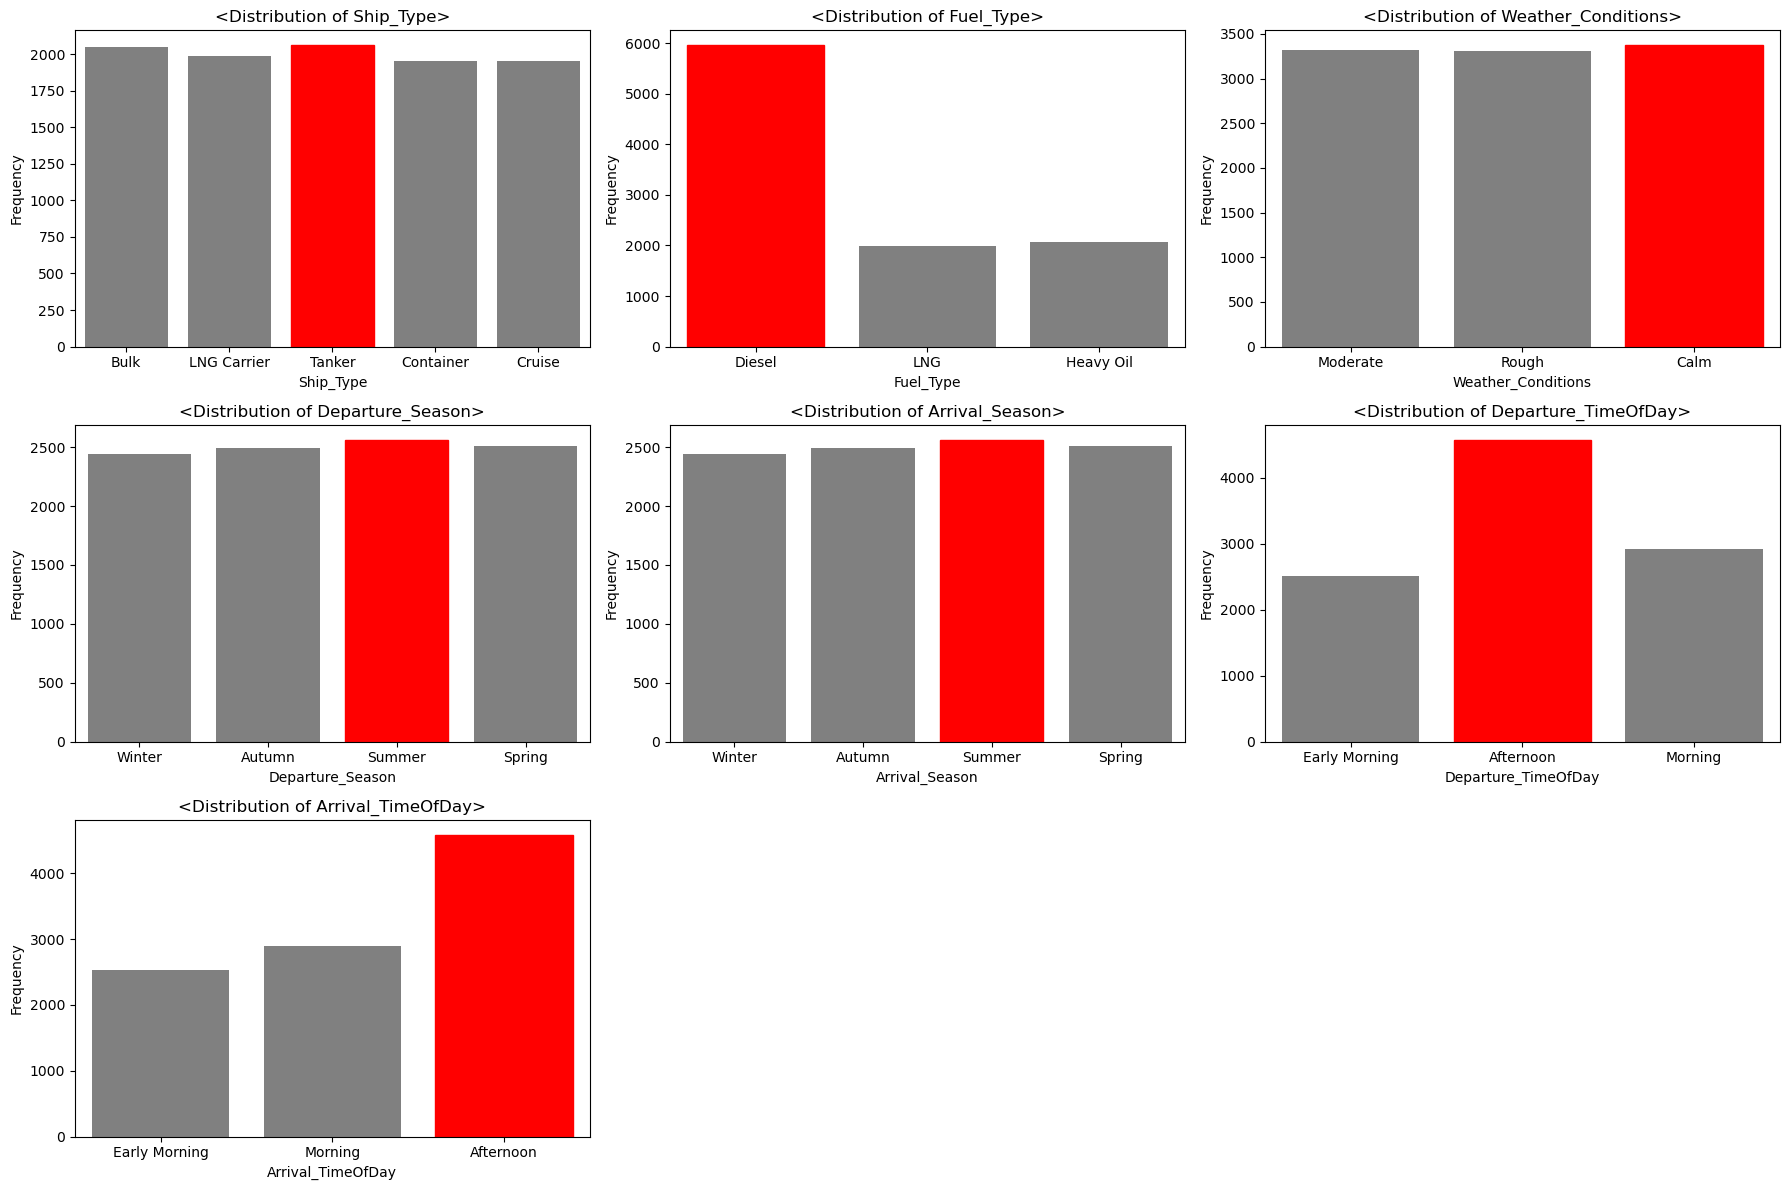

In [9]:
categorical_cols = ['Ship_Type','Fuel_Type','Weather_Conditions','Departure_Season', 'Arrival_Season', 'Departure_TimeOfDay', 'Arrival_TimeOfDay']

# 서브플롯의 행과 열의 수 결정
n_cols = 3  # 한 행에 표시할 그래프 수
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # 전체 그래프를 위한 최소한의 행 수

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # 전체 Figure 크기 조정

for idx, col in enumerate(categorical_cols, 1):  # enumerate 시작 인덱스를 1로 설정
    plt.subplot(n_rows, n_cols, idx)  # n_rows 행, n_cols 열의 서브플롯 생성
    sns.countplot(data=df_all, x=col, color='grey')  # 서브플롯에 countplot 생성
    
    # 가장 빈도가 높은 값의 인덱스 찾기
    max_value_index = df_all[col].value_counts().idxmax()
    
    # 가장 빈도가 높은 값의 바를 빨간색으로 색칠
    bars = plt.gca().patches
    for bar in bars:
        if bar.get_height() == df_all[col].value_counts()[max_value_index]:
            bar.set_color('red')
    
    plt.title(f'<Distribution of {col}>')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # 서브플롯 간의 충돌 방지
plt.show()

In [10]:
# 컬럼 생략 없이 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# 'Route_Category' 컬럼을 분리하기 위한 함수
def split_route_category(route_category):
    parts = route_category.split('-')
    main_route = int(parts[0].replace('Route', ''))
    sub_route = int(parts[1]) if len(parts) > 1 else 0
    return main_route, sub_route

# 새로운 컬럼 'Main_Route'와 'Sub_Route'를 생성
df_scaled['Main_Route'], df_scaled['Sub_Route'] = zip(*df_scaled['Route_Category'].apply(split_route_category))
df_scaled = df_scaled.drop('Route_Category', axis=1)

df_encoded = pd.get_dummies(df_scaled, columns=['Ship_Type','Fuel_Type','Weather_Conditions','Departure_Season', 'Arrival_Season', 'Departure_TimeOfDay', 'Arrival_TimeOfDay'])

df_encoded

,Fuel_Consumption_per_Day,Cargo_Volume,CO2_Emissions,Travel_Time,Speed_km,Distance_km,Main_Route,Sub_Route,Ship_Type_Bulk,Ship_Type_Container,Ship_Type_Cruise,Ship_Type_LNG Carrier,Ship_Type_Tanker,Fuel_Type_Diesel,Fuel_Type_Heavy Oil,Fuel_Type_LNG,Weather_Conditions_Calm,Weather_Conditions_Moderate,Weather_Conditions_Rough,Departure_Season_Autumn,Departure_Season_Spring,Departure_Season_Summer,Departure_Season_Winter,Arrival_Season_Autumn,Arrival_Season_Spring,Arrival_Season_Summer,Arrival_Season_Winter,Departure_TimeOfDay_Afternoon,Departure_TimeOfDay_Early Morning,Departure_TimeOfDay_Morning,Arrival_TimeOfDay_Afternoon,Arrival_TimeOfDay_Early Morning,Arrival_TimeOfDay_Morning
0,-0.826638,0.210579,0.167399,-0.966758,0.620783,0.132346,63,2,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False
1,0.619246,0.803039,0.326885,-0.256605,0.950067,0.401393,5,5,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,True
2,1.083995,0.243439,0.658386,0.484553,0.232569,0.738589,35,0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False
3,0.154498,0.064085,0.572434,0.094470,0.455241,0.626327,54,4,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True
4,0.051220,0.051337,0.575181,0.144752,0.587944,0.622775,62,4,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.704496,0.610494,0.325896,-0.565965,0.734143,0.349656,77,2,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1996,0.980717,0.568322,0.723346,2.241729,0.556005,0.871263,40,5,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False
1997,-3.356935,0.394180,0.047043,-1.592920,0.388214,0.011478,53,5,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False
1998,-1.652857,0.032569,0.523851,-0.070244,0.217724,0.548298,3,0,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False


#### Step 3. 탐색적 데이터 분석(EDA)

##### Step 3-1. 상관관계 분석 및 시각화
> 특정 조건(Ship_Type과 Fuel_Type)에 따라 그룹별로 세분화하여 분석하면, 해당 조건에 맞는 특정 패턴이나 인사이트를 더 명확히 파악할 수 있습니다. 

> 다만, 각 그룹 내에서 상관관계를 계산하고 모델을 생성하는 것은 비효율적일 수 있습니다.

> 이런 방식은 데이터를 분할하여 모델을 개별적으로 학습시키고, 유지 및 관리해야 하기 때문입니다. 
- 상관관계 계수의 부호와 크기를 통해 각 요소가 연료 소비량에 미치는 영향을 해석합니다.
- 상관관계를 시각적으로 확인하기 위해 히트맵 또는 산점도 그래프를 사용합니다.

In [11]:
# 상관관계 계산
correlation_matrix = df_encoded.corr()

# 'Fuel_Consumption_per_Day'와의 상관관계만 추출하고 절댓값 기준으로 내림차순 정렬
fuel_consumption_corr_part = correlation_matrix['Fuel_Consumption_per_Day'].drop('Fuel_Consumption_per_Day').sort_values(ascending=False, key=abs)[:20]
fuel_consumption_corr_part

Travel_Time                      0.675836
Distance_km                      0.627888
CO2_Emissions                    0.622956
Arrival_Season_Summer           -0.017468
Departure_Season_Summer         -0.017468
Speed_km                         0.014872
Arrival_Season_Autumn            0.014141
Departure_Season_Autumn          0.014141
Main_Route                      -0.013394
Cargo_Volume                    -0.009531
Departure_TimeOfDay_Afternoon    0.009112
Arrival_TimeOfDay_Morning       -0.009003
Departure_Season_Spring          0.008992
Arrival_Season_Spring            0.008992
Weather_Conditions_Rough        -0.008579
Sub_Route                       -0.007822
Weather_Conditions_Calm          0.007479
Fuel_Type_Heavy Oil             -0.006854
Ship_Type_Tanker                -0.006854
Ship_Type_Container              0.006384
Name: Fuel_Consumption_per_Day, dtype: float64

In [12]:
# 상관관계 계산
correlation_matrix = df_encoded.corr()

# 'Fuel_Consumption_per_Day'와의 상관관계만 추출하고 절댓값 기준으로 내림차순 정렬
fuel_consumption_corr = correlation_matrix['Fuel_Consumption_per_Day'].drop('Fuel_Consumption_per_Day').sort_values(ascending=False, key=abs)[:3]
fuel_consumption_corr

Travel_Time      0.675836
Distance_km      0.627888
CO2_Emissions    0.622956
Name: Fuel_Consumption_per_Day, dtype: float64

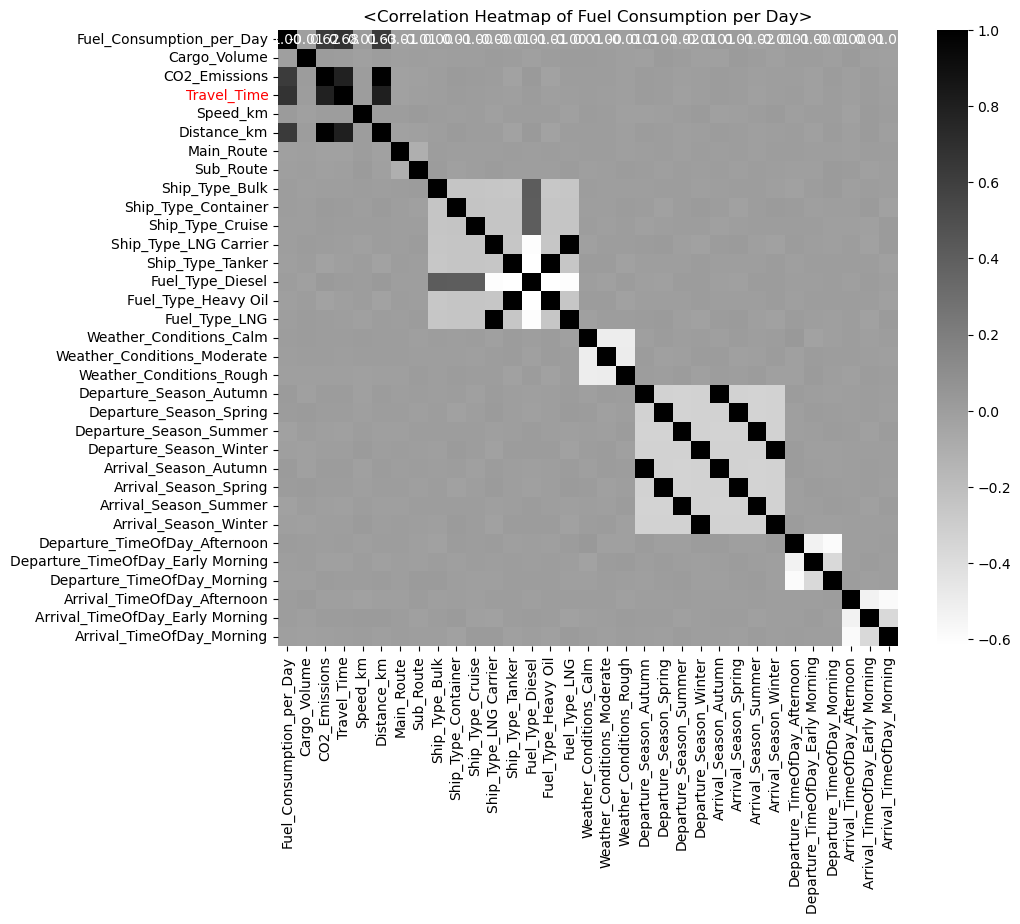

In [13]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='binary', fmt=".2f")

# 가장 큰 상관관계를 가진 변수(들)의 인덱스 찾기
max_corr_vars = correlation_matrix['Fuel_Consumption_per_Day'].drop('Fuel_Consumption_per_Day').abs().nlargest(1).index

# 가장 큰 상관관계를 가진 변수(들)의 y tick 레이블 색상 변경
for tick_label in heatmap.yaxis.get_ticklabels():
    if tick_label.get_text() in max_corr_vars:
        tick_label.set_color('red')

plt.title('<Correlation Heatmap of Fuel Consumption per Day>')
plt.show()


##### Step 3-2. 가설 설정
- 가설 : 상관관계 계수의 절댓값이 0.5 이상인 변수들이 'Fuel_Consumption_per_Day' 변수에 대해 가장 크게 영향을 미칠 것이다.

#### Step 4. 모델 선택, 훈련, 튜닝, 평가
- 주어진 데이터셋에는 다양한 변수들이 있으며, 이를 활용하여 Fuel_Consumption_per_Day를 예측하는 모델을 선택하고 훈련해야 합니다.
- 변수들 간의 상관관계를 고려하여 다음과 같은 모델들을 고려할 수 있습니다.
    - 다중 선형 회귀 모델 : 상관관계 분석 결과를 바탕으로 가장 상관관계가 높은 변수들을 선택하여 다중 선형 회귀 모델을 구축할 수 있습니다.
    - 의사 결정 나무(Decision Tree) 또는 랜덤 포레스트(Random Forest) 등의 트리 기반 모델 : 트리 기반 모델은 변수들 간의 비선형 관계를 잘 모델링할 수 있으며, 변수의 중요도를 해석하기 쉽습니다.
    - 신경망 모델 : 다층 퍼셉트론(MLP) 또는 딥러닝 모델을 활용하여 복잡한 변수들 간 비선형 관계를 모델링하는 데 좋은 성능을 보입니다.
    - 군집화(Clustering) 기반 모델 : 데이터 내의 패턴이 명확하지 않을 때 변수들을 그룹화하여 비슷한 성질을 가진 데이터끼리 묶어주는 군집화 기반 모델을 고려할 수 있습니다. (군집화 알고리즘은 주로 데이터를 유사한 그룹으로 분할하는 데 사용되나, 예측 모델을 구축하는 데 사용되지는 않습니다.)

    > 변수들 간의 관계가 선형인지 또는 비선형인지 파악하기 위해서는 변수들 간의 산점도를 그려보고, 이에 대한 추세선을 확인하는 것이 일반적입니다. 

    > 추세선이 직선 형태를 보이면 선형 관계가 있을 가능성이 높고, 곡선 형태를 보이면 비선형 관계일 가능성이 높습니다.

c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


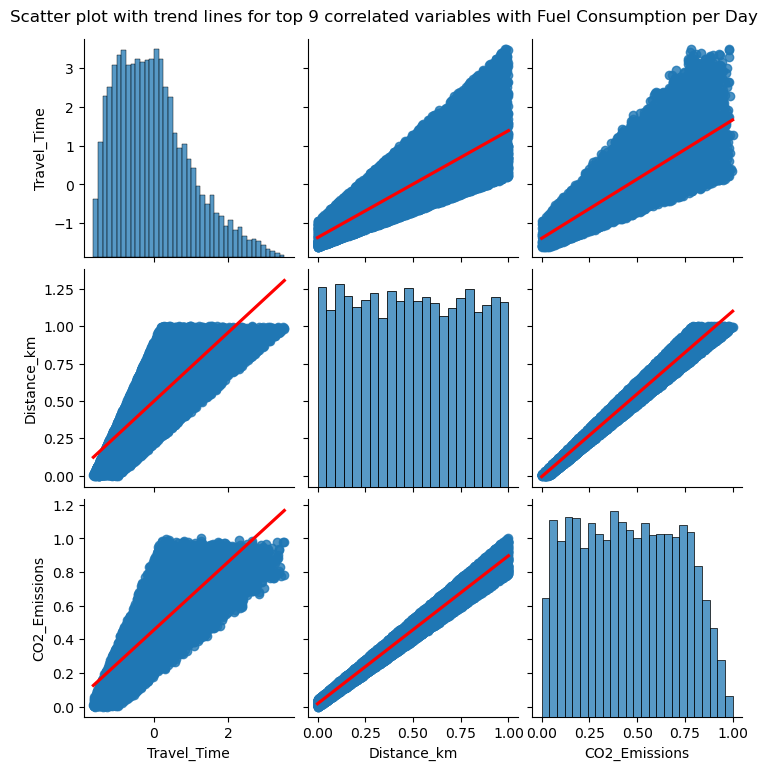

In [14]:
# seaborn의 pairplot을 사용하여 변수들 간의 산점도와 추세선 그리기
sns.pairplot(df_encoded[fuel_consumption_corr.index], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter plot with trend lines for top 9 correlated variables with Fuel Consumption per Day', y=1.02)
plt.show()

##### Step 4-1. 모델 선택, 훈련, 튜닝, 평가 - 다중 선형 회귀 모델
- 다중 선형 회귀 모델을 구축하여 Fuel_Consumption_per_Day를 예측하기 위해 다음과 같은 단계를 따를 수 있습니다.
    - 상관계수가 높은 변수 선택 : 상관관계 분석을 통해 Fuel_Consumption_per_Day와 상관계수가 높은 상위 변수들을 선택합니다. 이전 단계에서 구한 상관계수가 높은 변수들의 리스트를 사용합니다.
    - 다중 선형 회귀 모델 훈련 : 선형 회귀 모델을 선택한 변수들을 사용하여 훈련 데이터에 대해 모델을 학습합니다.
    - 모델 평가 : 테스트 세트를 사용하여 모델을 평가합니다. 평가 지표로는 주로 평균 제곱 오차(Mean Squared Error, MSE)나 결정 계수(R-squared) 등을 사용할 수 있습니다.
    - 모델 성능 향상 : 모델의 성능을 높이기 위해 변수 선택, 모델 파라미터 조정 등의 작업을 수행할 수 있습니다. 변수 선택 과정에서 필요한 경우 변수 변환 또는 스케일링을 적용할 수도 있습니다.
    - 모델 해석 : 모델이 어떻게 작동하는지 이해하고, 각 변수의 계수(coefficients)를 해석하여 변수들 간의 관계를 이해합니다.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 상관계수가 높은 변수 선택
selected_features = fuel_consumption_corr.index.tolist()

# 선택한 변수와 타겟 변수 선택
X = df_encoded[selected_features] # x는 상관계수가 높은 변수들
y = df_encoded['Fuel_Consumption_per_Day'] # y는 목표 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 결정 계수 계산
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.5249382851325068
R-squared: 0.48089703587950816


###### (부가 개념)
###### - Mean Squared Error(MSE)는 회귀 모델의 예측값과 실제 값 간의 차이를 측정하는 지표입니다. 이 값은 예측값과 실제 값 간의 차이를 제곱한 후 평균한 값입니다. 따라서 MSE가 작을수록 모델이 예측을 더 잘하고 있다고 할 수 있습니다.
###### > MSE가 0.5249라는 것은 모델의 예측이 실제 값과 다소 차이가 있다는 것을 의미합니다. 이 값이 특정 문맥에서 높은지 낮은지 판단하기 위해서는 해당 문제의 범위와 데이터의 다양성을 고려해야 합니다. 예를 들어, 예측하려는 값의 범위가 매우 넓거나 데이터에 큰 변동성이 있는 경우, MSE가 비교적 높게 나타날 수 있습니다.
###### - 결정계수는 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타내는 지표입니다. 이 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 잘 설명한다고 할 수 있습니다. 보통은 다음과 같은 기준으로 결정 계수를 해석합니다:
######    - 결정계수 값이 음수인 경우 : 모델이 데이터에 대해 매우 나쁜 예측을 한다는 것을 의미합니다.
######    - 결정계수 값이 0에 가까운 경우 : 모델이 종속 변수의 변동을 거의 설명하지 못함
######    - 결정계수 값이 0.3 미만 : 모델이 종속 변수의 일부 변동을 설명함
######    - 결정계수 값이 0.5 이상 : 모델이 종속 변수의 상당한 부분을 설명함
######    - 결정계수 값이 0.7 이상 : 모델이 종속 변수의 대다수 변동을 설명함
######    - 결정계수 값이 1에 가까운 경우 : 모델이 종속 변수의 변동을 거의 완벽하게 설명함
###### > 0.4809라는 값은 모델이 데이터의 약 48%의 변동성만을 설명하고 있다는 것을 의미합니다. 그러나 이 값 역시 분석하려는 데이터의 특성과 분야에 따라 해석이 달라질 수 있습니다.

###### - 난수 시드를 조정하는 것 역시 모델 튜닝 작업에 포함될 수 있습니다. 일반적으로 모델의 성능을 비교하고 최적의 매개 변수를 찾기 위해 교차 검증이나 재샘플링 기법을 사용합니다. 이때 난수 시드를 변경하면 각 실험의 결과가 달라지며, 이를 통해 모델의 일반적인 성능을 평가할 수 있습니다.
###### - 또한, 매개 변수 최적화 과정에서 랜덤한 초기화를 사용하는 모델이나 알고리즘이 있다면 난수 시드를 변경하여 각 실험의 결과를 일관되게 만들 수 있습니다. 이를 통해 모델이 최적의 매개 변수를 찾는 데 도움이 됩니다.
###### > 따라서 난수 시드를 조정하고 변경하는 것은 모델 튜닝 작업에서 중요한 요소 중 하나입니다.


##### Step 4-2. 모델 선택, 훈련, 튜닝, 평가 - 랜덤 포레스트(Random Forest)
- 의사결정나무(Decision Tree)와 랜덤 포레스트(Random Forest)는 모두 지도학습(Supervised Learning) 알고리즘으로 사용되는 머신러닝 모델입니다. 그러나 그들 간에는 몇 가지 중요한 차이가 있습니다.
    - 개념적 차이 :
        - 의사결정나무 : 의사결정나무는 트리(Tree) 구조를 사용하여 데이터를 분류(Classification) 또는 회귀(Regression)하는데 사용됩니다. 각 노드(Node)는 특정 기준(예: 특성의 값)에 따라 데이터를 분할하며, 각 분할은 클래스 또는 값에 대한 예측을 수행합니다.
        - 랜덤 포레스트 : 랜덤 포레스트는 여러 개의 의사결정나무를 앙상블(Ensemble)한 모델입니다. 각 의사결정나무는 랜덤하게 선택된 데이터 부분 집합(Bootstrap 샘플링) 및 특성 부분 집합을 기반으로 학습됩니다. 각 트리는 개별적으로 예측을 수행하고, 그 결과를 결합하여 최종 예측을 만듭니다.
    - 과대적합(Overfitting) 관리 :
        - 의사결정나무 : 의사결정나무는 훈련 데이터에 과대적합될 수 있는 경향이 있습니다. 이는 트리가 너무 깊어지면 발생할 수 있습니다.
        - 랜덤 포레스트 : 랜덤 포레스트는 많은 의사결정나무의 앙상블이기 때문에 과대적합을 관리하는 데 효과적입니다. 각 트리는 서로 다른 데이터 부분 집합 및 특성 부분 집합을 기반으로 학습되므로 개별 트리의 과대적합을 줄입니다.
    - 해석 가능성 :
        - 의사결정나무는 단일 트리이기 때문에 비교적 해석이 쉽습니다. 각 트리의 의사결정 경로를 살펴봄으로써 모델의 예측 기준을 이해할 수 있습니다.
        - 랜덤 포레스트는 여러 개의 트리를 결합한 것이므로 개별 트리를 해석하기는 어렵지만, 특성의 중요도를 추출하여 전체 모델의 기준을 이해할 수 있습니다.
    > 랜덤 포레스트는 일반적으로 의사결정나무보다 더 우수한 성능을 보이며, 과대적합을 줄이고 예측력을 향상시키는 데 효과적입니다.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# 훈련 데이터와 타겟 설정
X = df_encoded.drop('Fuel_Consumption_per_Day', axis=1)
y = df_encoded['Fuel_Consumption_per_Day']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 초기화 및 설정
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 결정 계수 계산
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.5545775180914688
R-squared: 0.451587278677533


##### Step 4-3. 모델 선택, 훈련, 튜닝, 평가 - 신경망 모델
- 신경망 모델을 사용하여 Fuel_Consumption_per_Day를 예측하는 모델을 구축하는 과정은 다음과 같습니다.
    - 데이터 준비
    - 데이터 전처리
    - 훈련 데이터와 테스트 데이터 분할
    - 모델 구축 :
        - 신경망 모델을 선택하고 적절한 구조를 정의합니다.
        - TensorFlow나 PyTorch와 같은 딥러닝 프레임워크를 사용하여 모델을 구축합니다.
    - 모델 훈련 :
        - 훈련 데이터를 사용하여 모델을 훈련시킵니다.
        - 손실 함수(loss function)와 옵티마이저(optimizer)를 선택하고 모델을 컴파일합니다.
        - fit 메서드를 사용하여 모델을 훈련시킵니다.
    - 모델 평가

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 특성과 타겟 변수 선택
X = df_encoded.drop('Fuel_Consumption_per_Day', axis=1)
y = df_encoded['Fuel_Consumption_per_Day']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

# 신경망 모델 구축
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_tensor.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=32, verbose=0)
# 모델 예측값 계산
y_pred = model.predict(X_test_tensor)

# 모델 평가
mse = model.evaluate(X_test_tensor, y_test_tensor, verbose=0)
print("Mean Squared Error:", mse)

# 결정 계수 계산
r_squared = r2_score(y_test_tensor, y_pred)
print("R-squared:", r_squared)


c:\Anaconda\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
Mean Squared Error: 0.6832373738288879
R-squared: 0.32425760785977875
